In [43]:

from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 20
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds




In [51]:
import pygame
import pygame.camera
import time
from PIL import Image

pygame.camera.init()
msg = pygame.camera.list_cameras() #Camera detected or not

print(msg)

cam = pygame.camera.Camera(msg[0],(640,480))


['FaceTime HD Camera']


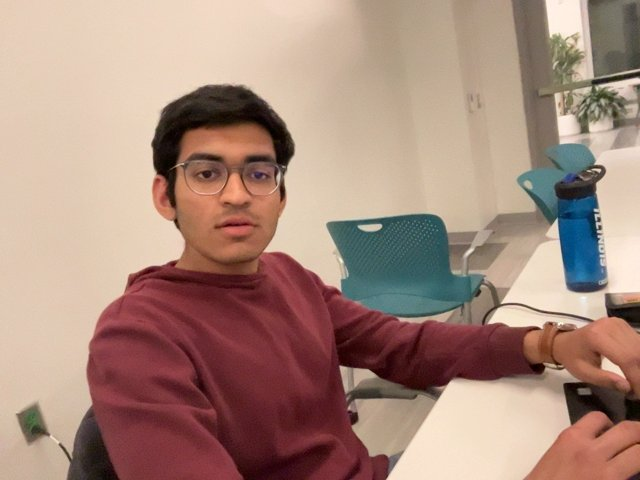

In [46]:
cam.start()

time.sleep(1)

img = cam.get_image()
pygame.image.save(img,"filename.jpg")
#Load the image
img_open = Image.open('filename.jpg')
img_open


In [50]:
txt = predict_step(['filename.jpg']) # ['a woman in a hospital bed with a woman in a hospital bed']
print(txt)

['a man sitting at a desk with a laptop']
